In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import our input dataset
charity_df = pd.read_csv('../Resources/charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
charity_df.shape

(34299, 12)

In [4]:
# Columns 
charity_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [5]:
# List dataframe data types
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [6]:
# Find null values
for column in charity_df.columns:
    print(f"Column {column} has {charity_df[column].isnull().sum()} null values")

Column EIN has 0 null values
Column NAME has 0 null values
Column APPLICATION_TYPE has 0 null values
Column AFFILIATION has 0 null values
Column CLASSIFICATION has 0 null values
Column USE_CASE has 0 null values
Column ORGANIZATION has 0 null values
Column STATUS has 0 null values
Column INCOME_AMT has 0 null values
Column SPECIAL_CONSIDERATIONS has 0 null values
Column ASK_AMT has 0 null values
Column IS_SUCCESSFUL has 0 null values


In [7]:
# Find duplicate entries
print(f"Duplicate entries: {charity_df.duplicated().sum()}")

Duplicate entries: 0


Although one-hot encoding is a very robust solution, it can be very memory-intensive. Therefore, categorical variables with a large number of unique values (or very large variables with only a few unique values) might become difficult to navigate or filter once encoded. To address this issue, we must reduce the number of unique values in the categorical variables. The process of reducing the number of unique categorical values in a dataset is known as **bucketing** or **binning**. Bucketing data typically follows one of two approaches:
- Collapse all of the infrequent and rare categorical values into a single “other” category.
- Create generalized categorical values and reassign all data points to the new corresponding values.  

**Collapse all of the infrequent and rare categorical values into a single “other” category.**  
This approach takes advantage of the fact that uncommon categories and “edge cases” are rarely statistically significant. Therefore, regression and classification models are unlikely to be able to use rare categorical values to produce robust models, and instead will ignore the rare events altogether and focus on more informative values.  

**Create generalized categorical values and reassign all data points to the new corresponding values.**  
This approach collapses the number of unique categorical values and maintains relative order and magnitude so that the machine learning model can train on the categorical variable with minimal impact to performance. This approach is particularly useful when dealing with a categorical variable whose distribution of unique values is relatively even. Once we have bucketed our categorical variables, we can proceed to transform the categorical variable using one-hot encoding.

In [8]:
# Print out the EIN value counts
EIN_counts = charity_df.EIN.value_counts()
EIN_counts

471361061    1
716145914    1
470850777    1
742622426    1
436124893    1
            ..
205040320    1
461149136    1
474460867    1
204833477    1
352260098    1
Name: EIN, Length: 34299, dtype: int64

Looking at the EIN’s unique value counts, all of them have a unique number in the dataset. This column will serve no purpose in our analysis and should be removed from the input data.

In [9]:
# Remove the column
charity_df.drop(columns=["EIN"], inplace=True)
charity_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [10]:
# Print out the NAME value counts
NAME_counts = charity_df.NAME.value_counts()
NAME_counts

PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
TRUE LIFE CHURCH- IGLESIA VIDA VERDADERA              1
ASSOCIATED STUDENTS                                   1
WHITEWATER AQUATICS MANAGEMENT                        1
FELLOWSHIP CENTER ALCOHOL SERVICES PROGRAM INC        1
YOUTH ENTREPRENEURS GEORGIA INC                       1
Name: NAME, Length: 19568, dtype: int64

Looking at the NAME’s unique value counts, there are a number of names that appear frequently in the dataset such as PARENT BOOSTER USA INC , TOPS CLUB INC, and UNITED STATES BOWLING CONGRESS INC. However, many names appear once. Although, it is does make one wonder why a name would have more than one instance, it will not serve a purpose in our analysis and should be removed from the input data.

In [11]:
# Remove the column
charity_df.drop(columns=["NAME"], inplace=True)
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [12]:
# Print out the APPLICATION_TYPE value counts
APPLICATION_TYPE_counts = charity_df.APPLICATION_TYPE.value_counts()
APPLICATION_TYPE_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

Looking at the APPLICATION_TYPE’s unique value counts, there are a number of applications that appear frequently in the dataset such as T3, T4, and T6. However, many applications appear semi-frequently and even more rarely appear in the dataset.  

The APPLICATION_TYPE column variables are considered as features for our model

How do we determine which applications are uncommon enough to bucket into the “other” category? The most straightforward method is to use a density plot to identify where the value counts “fall off” and set the threshold within this region.

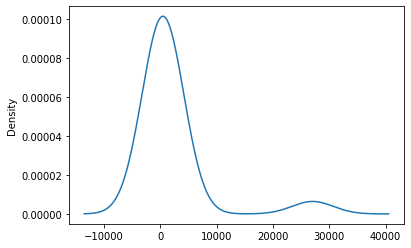

In [13]:
# Visualize the value counts
APPLICATION_TYPE_counts.plot.density()

According to the density plot, the most common unique values have more than 1000 instances within the dataset. Therefore, we can bucket any application that appears fewer than 1000 times in the dataset as “other.” To do this, we use a Python for loop and Pandas’ replace method.

In [14]:
# Determine which values to replace
replace_APPLICATION_TYPE = list(APPLICATION_TYPE_counts[APPLICATION_TYPE_counts < 1000].index)

# Replace in DataFrame
for i in replace_APPLICATION_TYPE:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(i,"Other")


# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

Now that we have reduced the number of unique values in the APPLICATION_TYPE variable, we can transpose the variable using one-hot encoding. The easiest way to perform one-hot encoding in Python is to use Scikit-learn’s OneHotEncoder module on the APPLICATION_TYPE variable. To build the encoded columns, we must create an instance of OneHotEncoder and “fit” the encoder with our values.

In [15]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(charity_df.APPLICATION_TYPE.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['APPLICATION_TYPE'])
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


We must join the encoded DataFrame with the original and drop the original “APPLICATION_TYPE” column. The process of joining the two DataFrames together is handled by the Pandas merge method and can be performed within one line.

In [16]:
# Merge the two DataFrames together and drop the APPLICATION_TYPE column
df1 = charity_df.merge(encode_df,left_index=True,right_index=True).drop("APPLICATION_TYPE",1)
df1

,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6
0,Independent,C1000,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0
1,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0
2,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0
3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0
4,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,Independent,C1000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0
34295,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0
34296,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0,0.0,0.0,1.0,0.0,0.0,0.0
34297,Independent,C3000,ProductDev,Association,1,0,N,5000,1,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Print out the AFFILIATION value counts
AFFILIATION_counts = charity_df.AFFILIATION.value_counts()
AFFILIATION_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

Looking at the AFFILIATION’s unique value counts, there are a couple of AFFILIATIONs that appear frequently in the dataset such as Independent and CompanySponsored. However, there are only four values that appear semi-frequently.  

The AFFILIATION column variables are considered as features for our model  

Now that we know the number of unique values in the affiliation variable is less than ten, we’re ready to transpose the variable using one-hot encoding

In [18]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(charity_df.AFFILIATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['AFFILIATION'])
encode_df.head()

,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
# Merge the two DataFrames together and drop the AFFILIATION column
df2 = df1.merge(encode_df,left_index=True,right_index=True).drop("AFFILIATION",1)
df2

,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional
0,C1000,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,C2000,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,C1000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34295,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34296,C2000,Preservation,Association,1,0,N,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34297,C3000,ProductDev,Association,1,0,N,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
# Print out the CLASSIFICATION value counts
CLASSIFICATION_counts = df2.CLASSIFICATION.value_counts()
CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C2600        1
C1283        1
C3700        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

Looking at the CLASSIFICATION’s unique value counts, there are a number of CLASSIFICATIONs that appear frequently in the dataset such as C1000, C2000, and C1200. However, many CLASSIFICATIONs appear semi-frequently and even more rarely appear in the dataset.  

The CLASSIFICATION column variables are considered as features for our model  

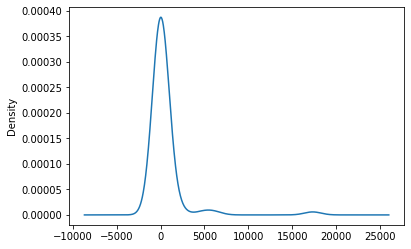

In [21]:
# Visualize the value counts
CLASSIFICATION_counts.plot.density()

According to the density plot, the most common unique values have more than 1000 instances within the dataset. Therefore, we can bucket any CLASSIFICATION that appears fewer than 1000 times in the dataset as “other.”

In [22]:
# Determine which values to replace
replace_CLASSIFICATION = list(CLASSIFICATION_counts[CLASSIFICATION_counts < 1000].index)

# Replace in DataFrame
for i in replace_CLASSIFICATION:
    df2.CLASSIFICATION = df2.CLASSIFICATION.replace(i,"Other")


# Check to make sure binning was successful
df2.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [23]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df2.CLASSIFICATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['CLASSIFICATION'])
encode_df.head()

,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Merge the two DataFrames together and drop the CLASSIFICATION column
df3 = df2.merge(encode_df,left_index=True,right_index=True).drop("CLASSIFICATION",1)
df3

,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,...,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34295,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,Preservation,Association,1,0,N,5000,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34297,ProductDev,Association,1,0,N,5000,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Print out the USE_CASE value counts
USE_CASE_counts = charity_df.USE_CASE.value_counts()
USE_CASE_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

Looking at the USE_CASE’s unique value counts, there are only five values that appear in the dataset.  

The USE_CASE column variables are considered as features for our model

Now that we know the number of unique values in the USE_CASE variable is less than ten, we’re ready to transpose the variable using one-hot encoding

In [26]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df3.USE_CASE.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['USE_CASE'])
encode_df.head()

,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [27]:
# Merge the two DataFrames together and drop the USE_CASE column
df4 = df3.merge(encode_df,left_index=True,right_index=True).drop("USE_CASE",1)
df4

,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,...,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,Association,1,0,N,5000,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,Association,1,0,N,5000,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# Print out the ORGANIZATION value counts
ORGANIZATION_counts = charity_df.ORGANIZATION.value_counts()
ORGANIZATION_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

Looking at the ORGANIZATION’s unique value counts, there are only four values that appear in the dataset.

The ORGANIZATION column variables are considered as features for our model

Now that we know the number of unique values in the ORGANIZATION variable is less than ten, we’re ready to transpose the variable using one-hot encoding

In [29]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df4.ORGANIZATION.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['ORGANIZATION'])
encode_df.head()

,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [30]:
# Merge the two DataFrames together and drop the ORGANIZATION column
df5 = df4.merge(encode_df,left_index=True,right_index=True).drop("ORGANIZATION",1)
df5

,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34295,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34296,1,0,N,5000,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
34297,1,0,N,5000,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [31]:
# Print out the STATUS value counts
STATUS_counts = charity_df.STATUS.value_counts()
STATUS_counts

1    34294
0        5
Name: STATUS, dtype: int64

Looking at the STATUS’s unique value counts, there are only two values that appear in the dataset.

The STATUS column variables are considered as features for our model

Now that we know the number of unique values in the STATUS variable is less than ten, we’re ready to transpose the variable using one-hot encoding.

In [32]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df5.STATUS.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['STATUS'])
encode_df.head()

,STATUS_0,STATUS_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [33]:
# Merge the two DataFrames together and drop the STATUS column
df6 = df5.merge(encode_df,left_index=True,right_index=True).drop("STATUS",1)
df6

,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,STATUS_0,STATUS_1
0,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
34295,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
34296,0,N,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
34297,0,N,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
# Print out the INCOME_AMT value counts
INCOME_AMT_counts = charity_df.INCOME_AMT.value_counts()
INCOME_AMT_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

Looking at the INCOME_AMT’s unique value counts, there are only nine values that appear in the dataset.

The INCOME_AMT column variables are considered as features for our model

Now that we know the number of unique values in the INCOME_AMT variable is less than ten, we’re ready to transpose the variable using one-hot encoding.

In [35]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df6.INCOME_AMT.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['INCOME_AMT'])
encode_df.head()

,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Merge the two DataFrames together and drop the INCOME_AMT column
df7 = df6.merge(encode_df,left_index=True,right_index=True).drop("INCOME_AMT",1)
df7

,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,STATUS_1,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,N,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,N,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Print out the SPECIAL_CONSIDERATIONS value counts
SPECIAL_CONSIDERATIONS_counts = charity_df.SPECIAL_CONSIDERATIONS.value_counts()
SPECIAL_CONSIDERATIONS_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

Looking at the SPECIAL_CONSIDERATIONS’s unique value counts, there are only two values that appear in the dataset.

The SPECIAL_CONSIDERATIONS column variables are considered as features for our model

Now that we know the number of unique values in the SPECIAL_CONSIDERATIONS variable is less than ten, we’re ready to transpose the variable using one-hot encoding.

In [38]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df7.SPECIAL_CONSIDERATIONS.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['SPECIAL_CONSIDERATIONS'])
encode_df.head()

,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [39]:
# Merge the two DataFrames together and drop the SPECIAL_CONSIDERATIONS column
df8 = df7.merge(encode_df,left_index=True,right_index=True).drop("SPECIAL_CONSIDERATIONS",1)
df8

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
# Print out the ASK_AMT value counts
ASK_AMT_counts = charity_df.ASK_AMT.value_counts()
ASK_AMT_counts

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

Looking at the ASK_AMT’s unique value counts, there is a number of ASK_AMT that appears frequently in the dataset; 5000. However, many ASK_AMT appear semi-frequently and even more rarely appear in the dataset.  

The ASK_AMT column variables are considered as features for our model

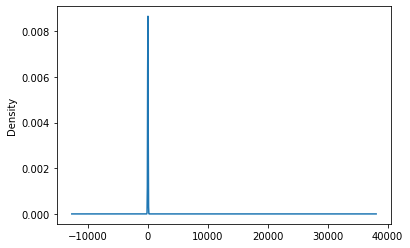

In [41]:
# Visualize the value counts
ASK_AMT_counts.plot.density()

According to the density plot, ASK_AMT has mostly unique values. it will not serve a purpose in our analysis and should be removed from the input data.

In [42]:
# Remove the column
df8.drop(columns=["ASK_AMT"], inplace=True)
df8.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
# Print out the IS_SUCCESSFUL value counts
IS_SUCCESSFUL_counts = charity_df.IS_SUCCESSFUL.value_counts()
IS_SUCCESSFUL_counts

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

Looking at the IS_SUCCESSFUL’s unique value counts, there are only two values that appear in the dataset.

The IS_SUCCESSFUL column variables are considered as a target for our model

Now that we know the number of unique values in the IS_SUCCESSFUL variable is less than ten, we’re ready to transpose the variable using one-hot encoding.

In [44]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df8.IS_SUCCESSFUL.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['IS_SUCCESSFUL'])
encode_df.head()

,IS_SUCCESSFUL_0,IS_SUCCESSFUL_1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [45]:
# Merge the two DataFrames together and drop the IS_SUCCESSFUL column
df = df8.merge(encode_df,left_index=True,right_index=True).drop("IS_SUCCESSFUL",1)
df

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,IS_SUCCESSFUL_0,IS_SUCCESSFUL_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34296,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [46]:
df.dtypes

APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_C2100            float64
CLASSIFICATION_C3000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64


In [47]:
# Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "float64"].index.tolist()
df_cat

['APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'STATUS_0',
 'STATUS_1',
 'INCOME_AMT_0',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_AMT_5M-10M',
 'SPECIAL_CONSIDERATIONS_N',
 'SPECIAL_CONSIDERATIONS_Y',
 'IS_SUCCESSFUL_0

 Make sure that none of the categorical variables have more than 10 unique values and require bucketing.

In [48]:
# Check the number of unique values in each column
df[df_cat].nunique()

APPLICATION_TYPE_Other          2
APPLICATION_TYPE_T19            2
APPLICATION_TYPE_T3             2
APPLICATION_TYPE_T4             2
APPLICATION_TYPE_T5             2
APPLICATION_TYPE_T6             2
AFFILIATION_CompanySponsored    2
AFFILIATION_Family/Parent       2
AFFILIATION_Independent         2
AFFILIATION_National            2
AFFILIATION_Other               2
AFFILIATION_Regional            2
CLASSIFICATION_C1000            2
CLASSIFICATION_C1200            2
CLASSIFICATION_C2000            2
CLASSIFICATION_C2100            2
CLASSIFICATION_C3000            2
CLASSIFICATION_Other            2
USE_CASE_CommunityServ          2
USE_CASE_Heathcare              2
USE_CASE_Other                  2
USE_CASE_Preservation           2
USE_CASE_ProductDev             2
ORGANIZATION_Association        2
ORGANIZATION_Co-operative       2
ORGANIZATION_Corporation        2
ORGANIZATION_Trust              2
STATUS_0                        2
STATUS_1                        2
INCOME_AMT_0  

Next we must split our training and testing data, then standardize our numerical variables using Scikit-learn’s StandardScaler module.  

For our purposes, we want to build a model that will predict whether or not an applicant will be successful if funded by Alphabet Soup; therefore, we must separate the “IS_SUCCESSFUL” columns from the rest of the input data. In fact, because the IS_SUCCESSFUL data is dichotomous (one of two values), we only need to keep the “IS_SUCCESSFUL_0” column—we can ignore the “IS_SUCCESSFUL_1” column because it is redundant.

In [49]:
# Split our preprocessed data into our features and target arrays
y = df["IS_SUCCESSFUL_0"].values
X = df.drop(["IS_SUCCESSFUL_0","IS_SUCCESSFUL_1"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Now that our training and testing data have been allocated, we’re ready to build our StandardScaler object and standardize the numerical features.

In [50]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# Suppress the tensionflow warning
tf.logging.set_verbosity(tf.logging.ERROR)

At last, our data is preprocessed and separated and ready for modelling. For our purposes, we will use the same framework we used for our basic neural network:
- For our **input layer**, we must add the number of input features equal to the number of variables in our feature DataFrame.
- In our **hidden layers**, our deep learning model structure will be slightly different—we’ll add two hidden layers with only a few neurons in each layer. To create the second hidden layer, we’ll add another Keras Dense class while defining our model. All of our hidden layers will use the relu activation function to identify nonlinear characteristics from the input values.
- In the **output layer**, we’ll use the same parameters from our basic neural network including the sigmoid activation function. The sigmoid activation function will help us predict the probability that an applicant will be successful if funded by Alphabet Soup.

In [52]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


Looking at our model summary, we can see that the number of weight parameters (weight coefficients) for each layer equals the number of input values times the number of neurons. Our first layer has 41 input values, and multiplied by the eight neurons gives us a total of 328 weight parameters—plenty of opportunities for our model to find trends in the dataset.

Now it is time to compile our model and define the loss and accuracy metrics. Since we want to use our model as a binary classifier, we’ll use the binary_crossentropy loss function, adam optimizer, and accuracy metrics.

In [53]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
# Suppress the tensionflow warning
tf.logging.set_verbosity(tf.logging.ERROR)

Training and evaluating the deep learning model is no different from a basic neural network. Depending on the complexity of the dataset, we may opt to increase the number of epochs to allow for the deep learning model more opportunities to optimize the weight coefficients.

In [55]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.6388 - acc: 0.6709
Epoch 2/100
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5911 - acc: 0.7282
Epoch 3/100
25724/25724 [==============================] - 1s 55us/sample - loss: 0.5758 - acc: 0.7299
Epoch 4/100
25724/25724 [==============================] - 1s 55us/sample - loss: 0.5686 - acc: 0.7304
Epoch 5/100
25724/25724 [==============================] - 1s 55us/sample - loss: 0.5654 - acc: 0.7310
Epoch 6/100
25724/25724 [==============================] - 1s 55us/sample - loss: 0.5637 - acc: 0.7303
Epoch 7/100
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5622 - acc: 0.7305
Epoch 8/100
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5610 - acc: 0.7312
Epoch 9/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5601 - acc: 0.7286
Epoch 10/100
25724/25724 [==============================] - 2s 64us/sampl

25724/25724 [==============================] - 2s 72us/sample - loss: 0.5515 - acc: 0.7340
Epoch 80/100
25724/25724 [==============================] - 3s 103us/sample - loss: 0.5511 - acc: 0.7330
Epoch 81/100
25724/25724 [==============================] - 3s 100us/sample - loss: 0.5511 - acc: 0.7332
Epoch 82/100
25724/25724 [==============================] - 2s 93us/sample - loss: 0.5509 - acc: 0.7343
Epoch 83/100
25724/25724 [==============================] - 3s 104us/sample - loss: 0.5508 - acc: 0.7335
Epoch 84/100
25724/25724 [==============================] - 3s 115us/sample - loss: 0.5510 - acc: 0.7331
Epoch 85/100
25724/25724 [==============================] - 3s 116us/sample - loss: 0.5510 - acc: 0.7338
Epoch 86/100
25724/25724 [==============================] - 4s 140us/sample - loss: 0.5510 - acc: 0.7325
Epoch 87/100
25724/25724 [==============================] - ETA: 0s - loss: 0.5501 - acc: 0.7335- ETA: 2s - loss: 0.5504  - ETA: 1s - loss - 4s 143us/sample - loss: 0.5510 - a

Lastly, now that our deep learning model is properly trained, we can evaluate the model’s performance by testing its predictive capabilities on our testing dataset.

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.5585 - acc: 0.7250
Loss: 0.5585288429051725, Accuracy: 0.7250145673751831


Looking at our deep learning model’s performance metrics, the model was able to correctly identify applicants who will be successful if funded by Alphabet Soup approximately 73% of the time. The deep learning model was able to produce a fairly reliable classifier.

In [57]:
# Define model
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


As with all machine learning algorithms, neural networks are not perfect and will often underperform using a basic implementation. When a neural network model does not meet performance expectations, it is usually due to one of two causes: inadequate or inappropriate model design for a given dataset, or insufficient or ineffective training data. Although collecting more training/test data is almost always beneficial, it may be impossible due to budget or logistical limitations. Therefore, the most straightforward means of improving neural network performance is tweaking the model design and parameters.  

When it comes to tweaking a neural network model, a little can go a long way. If we tweak too many design aspects and parameters at once, we can cause a model to become less effective without a means of understanding why. To avoid trapping ourselves in endless optimization iterations, we can use characteristics of our input data to determine what parameters should be changed.  

There are a few means of optimizing a neural network:
- Check out your input dataset.
- Add more neurons to a hidden layer.
- Add additional hidden layers.
- Use a different activation function for the hidden layers.
- Add additional epochs to the training regimen.  

**Check Out Your Input Dataset**
Before we start down the endless journey of model optimization, it is always a good idea to check the input data and ensure that there are no variables or set of outliers that are causing the model to be confused. Although neural networks are tolerant of noisy characteristics in a dataset, neural networks can learn bad habits (like the brain does). Even if we standardize and scale our numerical variables, too many outliers in a single variable can lead to performance issues.  

**Use a Different Activation Function**
Another strategy to increase performance of a neural network is to change the activation function used across hidden layers. Depending on the shape and dimensionality of the input data, one activation function may focus on specific characteristics of the input values, while another activation function may focus on others.  

It is important to use an activation function that matches the complexity of the input data. If we wanted to rank the four most-used activation functions by data complexity and ideal use case, the order would be as follows:
- The **sigmoid function** values are normalized to a probability between 0 and 1, which is ideal for binary classification.
- The **tanh function** can be used for classification or regression, and it expands the range between -1 and 1.
- The **ReLU function** is ideal for looking at positive nonlinear input data for classification or regression.
- The **Leaky ReLU function** is a good alternative for nonlinear input data with many negative inputs.  

**Add Additional Epochs to Training Regimen**  
If a model still requires optimizations and tweaking to meet desired performance, you can increase the number of epochs, or training iterations. As the number of epochs increases, so does the amount of information provided to each neuron. By providing each neuron more information from the input data, the neurons are more likely to apply more effective weight coefficients. 

In [58]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 328       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
# Suppress the tensionflow warning
tf.logging.set_verbosity(tf.logging.ERROR)

In [61]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200)

Epoch 1/200
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5995 - acc: 0.6910
Epoch 2/200
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5689 - acc: 0.7261
Epoch 3/200
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5626 - acc: 0.7308
Epoch 4/200
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5599 - acc: 0.7307
Epoch 5/200
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5588 - acc: 0.7318
Epoch 6/200
25724/25724 [==============================] - 3s 100us/sample - loss: 0.5572 - acc: 0.7312
Epoch 7/200
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5563 - acc: 0.7313
Epoch 8/200
25724/25724 [==============================] - 2s 82us/sample - loss: 0.5557 - acc: 0.7314
Epoch 9/200
25724/25724 [==============================] - 2s 82us/sample - loss: 0.5551 - acc: 0.7317
Epoch 10/200
25724/25724 [==============================] - 2s 89us/samp

25724/25724 [==============================] - 3s 126us/sample - loss: 0.5478 - acc: 0.7353
Epoch 80/200
25724/25724 [==============================] - 2s 75us/sample - loss: 0.5480 - acc: 0.7355
Epoch 81/200
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5479 - acc: 0.7347
Epoch 82/200
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5480 - acc: 0.7352
Epoch 83/200
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5477 - acc: 0.7352
Epoch 84/200
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5476 - acc: 0.7348
Epoch 85/200
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5474 - acc: 0.7351
Epoch 86/200
25724/25724 [==============================] - 2s 73us/sample - loss: 0.5477 - acc: 0.7352
Epoch 87/200
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5475 - acc: 0.7341
Epoch 88/200
25724/25724 [==============================] - 2s 64us/sample -

Epoch 157/200
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5464 - acc: 0.7353
Epoch 158/200
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5461 - acc: 0.7355
Epoch 159/200
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5463 - acc: 0.7360
Epoch 160/200
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5463 - acc: 0.7355
Epoch 161/200
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5464 - acc: 0.7355
Epoch 162/200
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5462 - acc: 0.7359
Epoch 163/200
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5464 - acc: 0.7349
Epoch 164/200
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5461 - acc: 0.7355
Epoch 165/200
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5463 - acc: 0.7355
Epoch 166/200
25724/25724 [============================

In [62]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.5549 - acc: 0.7256
Loss: 0.5549183752029352, Accuracy: 0.7255976796150208


Adding more epochs to the training parameters is not a perfect solution—if the model produces weight coefficients that are too effective, there is an increased risk of model overfitting. Therefore, models should be tested and evaluated each time the number of epochs are increased to reduce the risk of overfitting.

Looking at our deep learning model’s performance metrics after doubling the epochs, the model was able to correctly identify applicants who will be successful if funded by Alphabet Soup approximately 73% of the time. The deep learning model was able to produce a fairly reliable classifier. However, when compared to the previous deep learning model, this model produced a less reliable classifier. This models accuracy was 0.7254810333251953, while the previous model was 0.7271137237548828

In [63]:
# Define model
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 328       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


Neural networks, especially complex neural networks, are resource-hungary algorithms. When it comes to training neural networks on medium to large datasets, the amount of computation time to adequately train a model can take hours (or even days!) With simple modelling problems, like the ones covered in this module, training a model in the same notebook as an analysis is no problem. However, with more formal applications of neural network and deep learning models, data scientists cannot afford the time or resources to build and train a model each time they analyze data. In these cases, a trained model must be stored and accessed outside of the training environment.  

With TensorFlow, we have the ability to save and load neural network models at any stage, including partially trained models. When building a TensorFlow model, if we use Keras’ ModelCheckpoint method, we can save the model weights after it tests a set number of data points. Then, at any point, we can reload the checkpoint weights and resume model training. Saving checkpoints while training has a number of benefits:
- We can short-circuit our training loop at any time (stop the function by pressing CTRL+C, or by pressing the stop button at the top of the notebook). This can be helpful if the model is showing signs of overfitting.
- The model is protected from computer problems (power failure, computer crash, etc.). Worst-case scenario: We would lose five epochs’ worth of optimization.
- We can restore previous model weight coefficients to try and revert overfitting.

With our training data and our model defined, we’re ready to compile and train our model using checkpoints. To use checkpoints, we need to define the checkpoint file name and directory path. For our purposes, we’ll label our checkpoints by epoch number and contain them within their own folder. This ensures that our checkpoint files are neat, organized, and easily identifiable. Add and run the following code to our notebook:

In [64]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

Once we have defined the file structure and filepath, we need to create a callback object for our deep learning model. A callback object is used in the Keras module to define a set of functions that will be applied at specific stages of the training process.There are a number of different callback functions available that can create log files, force training to stop, send training status messages, or in our case save model checkpoints. To create an effective checkpoint callback using the ModelCheckpoint method, we need to provide the following parameters:
- filepath=checkpoint_path—the checkpoint directory and file structure we defined previously
- verbose=1—we’ll be notified when a checkpoint is being saved to the directory
- save_weights_only=True—saving the full model each time can fill up a hard drive very quickly; this ensures that the checkpoint files take up minimal space
- save_freq=1000—checkpoints will be saved every thousand samples tested (across all epochs)  

Bringing it all together, we can compile, train, and evaluate our deep learning model.

In [65]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True)
    # ERROR save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
25312/25724 [============================>.] - ETA: 0s - loss: 0.6801 - acc: 0.7214
Epoch 00001: saving model to checkpoints/weights.01.hdf5
25724/25724 [==============================] - 2s 83us/sample - loss: 0.6799 - acc: 0.7207
Epoch 2/100
24960/25724 [============================>.] - ETA: 0s - loss: 0.6007 - acc: 0.7235
Epoch 00002: saving model to checkpoints/weights.02.hdf5
25724/25724 [==============================] - 2s 68us/sample - loss: 0.6005 - acc: 0.7233
Epoch 3/100
25024/25724 [============================>.] - ETA: 0s - loss: 0.5839 - acc: 0.7249
Epoch 00003: saving model to checkpoints/weights.03.hdf5
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5838 - acc: 0.7250
Epoch 4/100
25216/25724 [============================>.] - ETA: 0s - loss: 0.5767 - acc: 0.7259
Epoch 00004: saving model to checkpoints/weights.04.hdf5
25724/25724 [==============================] - 3s 103us/sample - loss: 0.5770 - acc: 0.7257
Epoch 5/100
25408/25724

25724/25724 [==============================] - 2s 64us/sample - loss: 0.5629 - acc: 0.7347
Epoch 35/100
25376/25724 [============================>.] - ETA: 0s - loss: 0.5623 - acc: 0.7341
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25724/25724 [==============================] - 2s 60us/sample - loss: 0.5628 - acc: 0.7340
Epoch 36/100
24960/25724 [============================>.] - ETA: 0s - loss: 0.5635 - acc: 0.7335
Epoch 00036: saving model to checkpoints/weights.36.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5629 - acc: 0.7344
Epoch 37/100
25088/25724 [============================>.] - ETA: 0s - loss: 0.5623 - acc: 0.7348
Epoch 00037: saving model to checkpoints/weights.37.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5627 - acc: 0.7340
Epoch 38/100
25152/25724 [============================>.] - ETA: 0s - loss: 0.5631 - acc: 0.7345
Epoch 00038: saving model to checkpoints/weights.38.hdf5
25724/25724 [=======

25056/25724 [============================>.] - ETA: 0s - loss: 0.5623 - acc: 0.7345
Epoch 00068: saving model to checkpoints/weights.68.hdf5
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5615 - acc: 0.7350
Epoch 69/100
25248/25724 [============================>.] - ETA: 0s - loss: 0.5611 - acc: 0.7348
Epoch 00069: saving model to checkpoints/weights.69.hdf5
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5614 - acc: 0.7347
Epoch 70/100
25184/25724 [============================>.] - ETA: 0s - loss: 0.5609 - acc: 0.7355
Epoch 00070: saving model to checkpoints/weights.70.hdf5
25724/25724 [==============================] - 2s 60us/sample - loss: 0.5613 - acc: 0.7349
Epoch 71/100
25664/25724 [============================>.] - ETA: 0s - loss: 0.5615 - acc: 0.7354
Epoch 00071: saving model to checkpoints/weights.71.hdf5
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5614 - acc: 0.7354
Epoch 72/100
25408/25724 [=======

After running the previous code, we have created our trained model within the Python session, as well as a folder of checkpoints we can use to restore previous model weights. Now if we ever need to restore weights, we can use the Keras Sequential model’s load_weights method to restore the model weights. To test this functionality, we defined another deep learning model, but restore the weights using the checkpoints rather than training the model.

In [66]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.5770 - acc: 0.7243
Loss: 0.5769693427530739, Accuracy: 0.7243148684501648


Using the checkpoints, we were able to regenerate the model instantaneously and confirm the model was able to produce the exact same results.

Looking at the model training output, we know that the loss metric was 0.07 and the predictive accuracy is 1.0. This means that although our model performance had more loss than the simulation data, the model correctly classifies all of our training data, which is sufficient for our needs.  

Under the hood, the neural network will select random weights to start training the model, so that each and every time we create a neural network, the model will be different. However, due to the adam optimizer, our model’s end performance should be very similar, regardless of the loss function.  

When training completes, the model object stores the loss and accuracy metrics across all epochs, which we can use to visualize the training progress. For example, if we wanted to visualize our model’s loss over the full 100 epochs, we can run the following code in our notebooks:

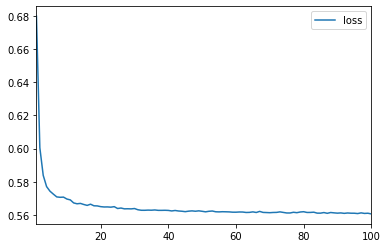

In [67]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

Similarly, we can plot the accuracy over time using the same DataFrame:

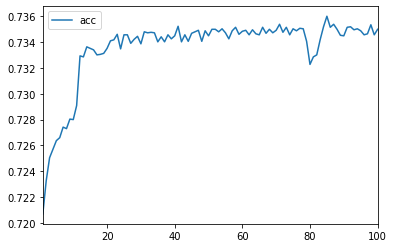

In [68]:
# Plot the accuracy
history_df.plot(y="acc")

Checkpoints are a great way to save model weights during training, but they fall short when it comes to sharing a trained model. In data science, trained models are published in scientific papers, deployed in software, open-sourced on GitHub, not to mention passed along to colleagues. In these cases, it is not practical to pass along only model weights, which can cause frustration and confusion. Instead, we can use the Keras Sequential model’s save method to export the entire model (weights, structure, and configuration settings) to an Hierarchical Data Format (HDF5
 (Links to an external site.)
) file. Once saved, anyone can import the exact same trained model to their environment by using the Keras load_model method and use it for analysis.

Currently, in our notebook environment, we should have a fully trained classification model that can predict employee attrition based on features in the dataset.

In [69]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

After running the code, we should see a file named “trained_attrition.h5,” which contains the complete model and configuration. Now that we have the model saved, we can create the model at any point.

In [70]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

Lastly, we can test the performance of the model on our test dataset 

In [71]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.5770 - acc: 0.7243
Loss: 0.5769693427530739, Accuracy: 0.7243148684501648


Looking at the final results, our imported model was able to reproduce the exact same performance metrics as the original model. Using this same procedure, we can import any type of Keras model for evaluation on a dataset with the same features.